<h1>Pengaplikasian Model Linear Regression 1</h1>

Aplikasikan model linear regresi kedalam data berikut. Kemudian tunjukan parameter koefesien dan intercept dari model tersebut.

In [ ]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

rng = np.random.RandomState(1)

x = 10 * rng.rand(50, 4)
y = np.array([  0.9826564 ,  49.40390035,  85.76013175,  29.17254633,
        11.270054  ,  61.53852735, -19.52503854,  10.10230867,
        82.03058206,  45.72660678,  82.09252575,  90.78872391,
        67.94178098,  39.97492762, 124.78866966,  85.24615819,
        85.68491086,  80.39481211,  14.54591581, 137.19722354,
        85.04063428,  94.76681927,  84.64289989,  38.76421156,
        47.33953927,  94.50853335,  77.3276567 ,  -9.77846805,
        61.13434468,  42.12124052,  26.65634335, 120.41593333,
       138.08132504, 103.33745675, 145.64447692,  19.54777986,
        87.40631024, 111.47327389,  95.94874761, 146.34817502,
       118.10333528,  56.85956484, 108.57660235, 114.30790247,
        40.27107041,  73.83871008,  45.52217182,  -7.57752547,
       147.81772162, 139.40285349])

In [ ]:
x = pd.DataFrame(list(x)) 
x.columns =['x1', 'x2', 'x3', 'x4']

In [ ]:
#Split the data
X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=0.25,random_state=0)

In [ ]:
ols_model = LinearRegression().fit(X_train, y_train)

# Predict in Training Dataset
y_train_pred = ols_model.predict(X_train)

# Predict in Test Dataset
y_test_pred = ols_model.predict(X_test)

Nilai Parameter:

In [ ]:
#nilai koefisien
ols_model.coef_

array([ 1.5, -5. ,  9. , 10. ])

In [ ]:
#nilai intercept
ols_model.intercept_

0.5000000006939302

nilai koef x1 = 1.5

nilai koef x2 = -5

nilai koef x3 = 9

nilai koef x4 = 10

nilai intercept = 0.5





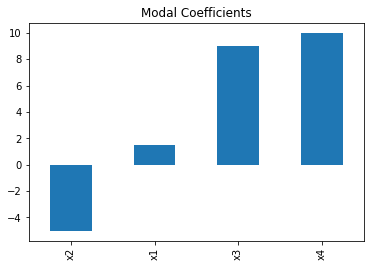

In [ ]:
predictors = X_train.columns
coef = pd.Series(ols_model.coef_,predictors).sort_values()
coef.plot(kind='bar', title='Modal Coefficients')

In [ ]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

#R^2
print('r2 score train =',r2_score(y_train, y_train_pred))
print('r2 score test =',r2_score(y_test, y_test_pred))

#MAE
print('MAE train =',mean_absolute_error(y_train, y_train_pred))
print('MAE test =',mean_absolute_error(y_test, y_test_pred))

#MSE
print('MSE train =',mean_squared_error(y_train, y_train_pred))
print('MSE test =',mean_squared_error(y_test, y_test_pred))

r2 score train = 1.0
r2 score test = 1.0
MAE train = 2.447979338757253e-09
MAE test = 3.428390836181559e-09
MSE train = 7.893981959629617e-18
MSE test = 1.8100634862852813e-17


In [ ]:
print('Nilai persamaan: y =',"{:.2f}".format(ols_model.coef_[0]),'x1+',"{:.2f}".format(ols_model.coef_[1]),'x2+',"{:.2f}".format(ols_model.coef_[2]),'x3+',"{:.2f}".format(ols_model.coef_[3]),'x4+',"{:.2f}".format(ols_model.intercept_))

Nilai persamaan: y = 1.50 x1+ -5.00 x2+ 9.00 x3+ 10.00 x4+ 0.50


<h1>Pengaplikasian Model Linear Regression 2</h1>

Download [`taiwan_real_estate2.csv](https://drive.google.com/file/d/1CgU-QIxvK_r-My8I0RSYR647JQMFlCJn/view?usp=sharing)


1. Buat model regresi linear dengan response variable price (kolom `price_twd_msq`) dan explanatory variable jumlah store yang beredar di sekitar (kolom `n_convenience`). Bagaimana cara kita mengukur performa model tersebut? Apa kesimpulan yang bisa ditarik? 
2. Buat qq-plot dari hasil model tersebut. Apa insight yang bisa kita dapatkan? 
Pengumpulan dapat melalui google colab/notebook. Kata-kata penjelasan tambahan dapat ditaro di cell dalam notebook tersebut. Good luck! 
*untuk package teman-teman bebas memilih. Opsi salah satunya adalah dengan mengimport `ols` dan `qqplot` dari package `statsmodel` 
from statsmodels.formula.api import ols 
from statsmodels.api import qqplot


In [ ]:
df = pd.read_csv('/content/taiwan_real_estate2.csv')

In [ ]:
df

,dist_to_mrt_m,n_convenience,house_age_years,price_twd_msq
0,84.87882,10,30 to 45,11.467474
1,306.59470,9,15 to 30,12.768533
2,561.98450,5,0 to 15,14.311649
3,561.98450,5,0 to 15,16.580938
4,390.56840,5,0 to 15,13.040847
...,...,...,...,...
409,4082.01500,0,0 to 15,4.659607
410,90.45606,9,0 to 15,15.128593
411,390.96960,7,15 to 30,12.284418
412,104.81010,5,0 to 15,15.885023


In [ ]:
x = df['n_convenience']
y= df['price_twd_msq']


In [ ]:
#Split the data
X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=0.25,random_state=0)

In [ ]:
# Using Multiple Linear Regression
# OLS Stands for Ordinary Least Square
# OLS Optimization Method for Linear Regression
# X_train = X_train
ols_model = LinearRegression().fit(X_train.values.reshape(-1, 1), y_train)

# Predict in Training Dataset
y_train_pred = ols_model.predict(X_train.values.reshape(-1, 1))

# Predict in Test Dataset
y_test_pred = ols_model.predict(X_test.values.reshape(-1, 1))

In [ ]:
#nilai koefisien
ols_model.coef_

array([0.82792541])

In [ ]:
#nilai intercept
ols_model.intercept_

8.210670847223653

In [ ]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

#R^2
print('r2 score train =',r2_score(y_train, y_train_pred))
print('r2 score test =',r2_score(y_test, y_test_pred))

#MAE
print('MAE train =',mean_absolute_error(y_train, y_train_pred))
print('MAE test =',mean_absolute_error(y_test, y_test_pred))

#MSE
print('MSE train =',mean_squared_error(y_train, y_train_pred))
print('MSE test =',mean_squared_error(y_test, y_test_pred))

r2 score train = 0.33339319503862597
r2 score test = 0.29300713133795697
MAE train = 2.5561350265202885
MAE test = 2.572561569179402
MSE train = 11.596436411677267
MSE test = 10.87373120659662


In [ ]:
print('Nilai persamaan: y =',"{:.2f}".format(ols_model.coef_[0]),'n convenience+',"{:.2f}".format(ols_model.intercept_))

Nilai persamaan: y = 0.83 n convenience+ 8.21


1. Buat model regresi linear dengan response variable price (kolom price_twd_msq) dan explanatory variable jumlah store yang beredar di sekitar (kolom n_convenience). Bagaimana cara kita mengukur performa model tersebut? Apa kesimpulan yang bisa ditarik?

Ans: performa dapat diukur dengan menggunakan r2, MAE, MSE.
r2 dengan menggunakan OLS linear regression cukup rendah hanya 33% untuk data train, 29% untuk data testing
MAE di data train hampir sama dengan di data testing yaitu di 2.55 dan 2.57
MSE data train lebih besar dibanding data test yaitu 11.60 dibanding 10.87 menandakan outlier di data train lebih besar karena data MAE nya lebih kecil

Kesimpulan: linear regresi OLS belum bs memprediksi harga rumah dengan jumlah convenience karena model hanya bisa sekitar 33% dari variabel jumlah convenience karena r2 yang rendah.

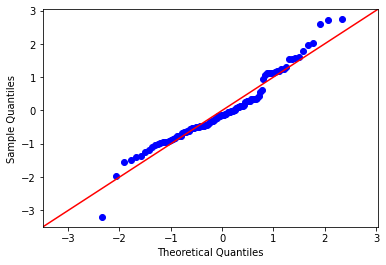

In [ ]:
import statsmodels.api as sm
import pylab as py
  
diff_test= y_test-y_test_pred

import statsmodels.api as sm
sm.qqplot(diff_test,fit=True,line='45')
plt.show()


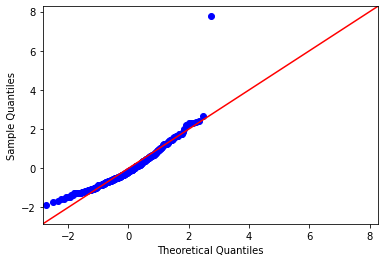

In [ ]:
diff_train= y_train-y_train_pred

import statsmodels.api as sm
sm.qqplot(diff_train,fit=True,line='45')
plt.show()


2. Buat qq-plot dari hasil model tersebut. Apa insight yang bisa kita dapatkan? Pengumpulan dapat melalui google colab/notebook. Kata-kata penjelasan tambahan dapat ditaro di cell dalam notebook tersebut. Good luck!

Ans: terdapat 1 data outlier ( di atas garis dekat koordinat x=3) yang cukup besar jaraknya di data training, serta 1 data outlier ( di bawah garis dekat koordinat x=-2) yang jaraknya cukup kecil di data testing 

hal ini didukung dari data MSE data train yang lebih besar dari data test padahal MAE data train lebih kecil dari data test